[ 항공 지연 사유와 기상상황의 관계 분석 ]
- Analysis of the Relationship Between Flight Delays and Weather Conditions

- Flight Delay & Weather Analysis

- 김포 공항 2024년 01월 01일 ~ 2024년 12월 31일 착륙 데이터 분석

In [35]:
# 모듈 실행
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [36]:
#%pip install seaborn

In [37]:
## Trial 1 에서 GIMPO_ARRIVAL_24.csv 와 GIMPO_WEATHER_HOUR_24.csv 파일 생성
## 파일 위치 : C:\Users\KDP-27\Desktop\KDT7\TEAM_Project\03_VISUAL_project\DATA\월별 병합 후 자료

# csv 파일 불러오기
CSV_ARRIVAL='../DATA/월별 병합 후 자료/GIMPO_ARRIVAL_24.csv'
CSV_WEATHER='../DATA/월별 병합 후 자료/GIMPO_WEATHER_HOUR_24.csv'

# csv 파일 pandas로 읽기
ARRIVAL_BASIC=pd.read_csv(CSV_ARRIVAL)
WEATHER_BASIC=pd.read_csv(CSV_WEATHER)

In [38]:
ARRIVAL_BASIC.head(1)

,출/도착구분,날짜,항공사,편명,출발공항코드,출발공항명,도착공항코드,도착공항명,계획시간,예상시간,도착시간,구분,현황
0,도착,20240101,이스타항공,ZE262F,ICN,인천,GMP,김포,07:15,06:50,07:34,기타,지연


In [39]:
WEATHER_BASIC.head(1)

,지점,지점명,일시,풍향(deg),풍속(KT),시정(m),전운량(1/8),기온(°C),이슬점온도(°C),해면기압(hPa),현지기압(hPa),강수량(mm)
0,110,김포공항,2024-01-01 00:00,330,2,2500,1,-2.2,-2.2,1027.1,1024.8,NaN


In [40]:
# ARRIVAL_BASIC   일시 2024-01-01 00:00  행 분리 후 열 추가
#                 => 날짜 2024-01-01
#                 => 시간 00:00
WEATHER_BASIC[['날짜','시간']]=WEATHER_BASIC['일시'].str.split(' ',expand=True)

In [41]:
# WEATHER_BASIC의 '강수량(mm)' NaN 값을 0.으로 변경
WEATHER_BASIC['강수량(mm)'] = WEATHER_BASIC['강수량(mm)'].fillna(0.)

In [42]:
# ARRIVAL_BASIC 날짜 형식 : 20240101 => 2024-01-01
ARRIVAL_BASIC['날짜'] = pd.to_datetime(ARRIVAL_BASIC['날짜'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

In [43]:
ARRIVAL_BASIC.head(1)

,출/도착구분,날짜,항공사,편명,출발공항코드,출발공항명,도착공항코드,도착공항명,계획시간,예상시간,도착시간,구분,현황
0,도착,2024-01-01,이스타항공,ZE262F,ICN,인천,GMP,김포,07:15,06:50,07:34,기타,지연


In [44]:
WEATHER_BASIC.head(1)

,지점,지점명,일시,풍향(deg),풍속(KT),시정(m),전운량(1/8),기온(°C),이슬점온도(°C),해면기압(hPa),현지기압(hPa),강수량(mm),날짜,시간
0,110,김포공항,2024-01-01 00:00,330,2,2500,1,-2.2,-2.2,1027.1,1024.8,0.0,2024-01-01,00:00


In [45]:
## 두 데이터프레임 병합을 위한 작업
# ARRIVAL_BASIC '도착시간' 열의 시(hour) 부분만 추출 후 열 추가 (예: "07:34" → "07") 
ARRIVAL_BASIC['도착시간_시'] = ARRIVAL_BASIC['도착시간'].str[:2]

# WEATHER_BASIC '날짜' 열의 시(hour) 부분만 추출 후 열 추가
WEATHER_BASIC['시간_시'] = WEATHER_BASIC['시간'].str[:2]

In [46]:
ARRIVAL_BASIC.head(1)

,출/도착구분,날짜,항공사,편명,출발공항코드,출발공항명,도착공항코드,도착공항명,계획시간,예상시간,도착시간,구분,현황,도착시간_시
0,도착,2024-01-01,이스타항공,ZE262F,ICN,인천,GMP,김포,07:15,06:50,07:34,기타,지연,07


In [47]:
WEATHER_BASIC.head(1)

,지점,지점명,일시,풍향(deg),풍속(KT),시정(m),전운량(1/8),기온(°C),이슬점온도(°C),해면기압(hPa),현지기압(hPa),강수량(mm),날짜,시간,시간_시
0,110,김포공항,2024-01-01 00:00,330,2,2500,1,-2.2,-2.2,1027.1,1024.8,0.0,2024-01-01,00:00,00


In [48]:
## 두 데이터프레임 병합
GIMPO = pd.merge(WEATHER_BASIC, ARRIVAL_BASIC,
        how='inner',
        left_on=['날짜', '시간_시'],
        right_on=['날짜', '도착시간_시'])

# 병합결과를 csv 파일로 저장 (한글 인코딩)
GIMPO.to_csv('ARRIVAL_and_WEATHER.csv', index=False, encoding='utf-8-sig')

In [49]:
# 병합결과 확인
GIMPO.head(1)

,지점,지점명,일시,풍향(deg),풍속(KT),시정(m),전운량(1/8),기온(°C),이슬점온도(°C),해면기압(hPa),...,출발공항코드,출발공항명,도착공항코드,도착공항명,계획시간,예상시간,도착시간,구분,현황,도착시간_시
0,110,김포공항,2024-01-01 07:00,280,2,700,6,-2.4,-2.4,1029.4,...,ICN,인천,GMP,김포,07:15,06:50,07:34,기타,지연,07


In [50]:
GIMPO.columns

Index(['지점', '지점명', '일시', '풍향(deg)', '풍속(KT)', '시정(m)', '전운량(1/8)', '기온(°C)',
       '이슬점온도(°C)', '해면기압(hPa)', '현지기압(hPa)', '강수량(mm)', '날짜', '시간', '시간_시',
       '출/도착구분', '항공사', '편명', '출발공항코드', '출발공항명', '도착공항코드', '도착공항명', '계획시간',
       '예상시간', '도착시간', '구분', '현황', '도착시간_시'],
      dtype='object')

In [51]:
GIMPO.drop(columns=['지점','지점명','풍향(deg)','해면기압(hPa)','현지기압(hPa)','날짜', 
                    '시간', '시간_시','출/도착구분', '항공사', '편명', '출발공항코드', 
                    '출발공항명', '도착공항코드', '도착공항명', '예상시간','도착시간_시'],inplace=True)

In [120]:
GIMPO

,일시,풍속(KT),시정(m),전운량(1/8),기온(°C),이슬점온도(°C),강수량(mm),계획시간,도착시간,구분,현황,diff,delay_flag
0,2024-01-01 07:00,2,700,6,-2.4,-2.4,0.0,07:15,07:34,기타,지연,0.0,1
1,2024-01-01 08:00,1,700,5,-2.6,-2.8,0.0,08:10,08:56,여객,지연,0.2,1
2,2024-01-01 08:00,1,700,5,-2.6,-2.8,0.0,08:15,08:44,여객,지연,0.2,1
3,2024-01-01 08:00,1,700,5,-2.6,-2.8,0.0,08:15,08:10,여객,도착,0.2,0
4,2024-01-01 08:00,1,700,5,-2.6,-2.8,0.0,08:25,08:22,여객,도착,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64183,2024-12-31 22:00,1,10000,0,-5.0,-7.9,0.0,22:30,22:27,여객,도착,2.9,0
64184,2024-12-31 22:00,1,10000,0,-5.0,-7.9,0.0,22:30,22:22,여객,도착,2.9,0
64185,2024-12-31 22:00,1,10000,0,-5.0,-7.9,0.0,22:35,22:40,여객,도착,2.9,0
64186,2024-12-31 22:00,1,10000,0,-5.0,-7.9,0.0,22:35,22:30,여객,도착,2.9,0


In [52]:
# 이슬점온도(°C) (Dew Point Temperature):

# 의미: 공기가 포화 상태가 되어 수증기가 물방울(이슬)로 응결되기 시작하는 온도를 나타냅니다.

# 설명: 이슬점온도가 높을수록 공기 중에 수증기가 많이 포함되어 있어 습도가 높은 상태를 의미합니다. 
# 반대로 이슬점온도가 낮으면 공기가 건조한 상태임을 나타냅니다.

# 이 두 값은 기상 상황을 파악하는 데 중요한 역할을 하며, 특히 기온과 이슬점온도의 차이가 작으면 대기가 포화 상태에 가까워져 
# 안개, 이슬, 또는 강수 발생 가능성이 높아집니다.

In [53]:
# 계획시간 (Scheduled Time):

# 항공사가 원래 정한 공식적인 출발 또는 도착 시간을 의미합니다.
# 예를 들어, 항공권 예약 시 안내되는 시간이 이 시간입니다.

# 예상시간 (Estimated Time):

# 실시간 운항 상황(예: 기상, 항공 교통 상황 등)에 따라 업데이트되는 시간입니다.
# 항공사가 현재 상황을 반영하여 변경된 예상 도착 또는 출발 시간을 안내할 때 사용합니다.

# 도착시간 (Actual Arrival Time):

# 항공기가 실제로 도착한 시간을 의미합니다.
# 모든 운항이 완료된 후 기록되는 최종 도착 시간입니다.


# 항공기 지연 분석 시 비교할 시간
# 일반적으로 항공기 지연을 분석할 때는 **계획시간 (Scheduled Time)**과 **도착시간 (Actual Arrival Time)**을 비교합니다.

# 지연 시간 = 실제 도착시간 - 계획 도착시간
# 이 방식이 가장 표준적인 지연 분석 방법입니다.
# 추가적으로,

# **예상시간 (Estimated Time)**은 운항 중에 업데이트되는 값이므로, 지연 추이를 실시간으로 파악하거나 예측 모델을 만들 때 참고할 수 있습니다.
# 그러나 최종적인 지연 여부를 평가하려면 실제 도착시간과 계획시간의 차이가 기준이 됩니다.
# 따라서 항공기 지연 분석을 위해서는 계획시간과 도착시간을 비교하는 것이 일반적입니다.

In [65]:
# 한글 폰트 설정 (Windows: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 그래프에서 마이너스(-) 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [66]:
# 현황 열의 값 체크 (NaN 값도 표시되게)
COUNT=GIMPO['현황'].value_counts(dropna=False)
print(COUNT)

현황
도착    48830
지연    15356
회항        2
Name: count, dtype: int64


In [67]:
GIMPO.describe()
# mean 평균, std 표준편차

,풍속(KT),시정(m),전운량(1/8),기온(°C),이슬점온도(°C),강수량(mm)
count,64188.000000,64188.000000,64188.000000,64188.000000,64188.000000,64188.000000
mean,6.024755,9309.286783,3.686982,15.734119,8.880258,0.139271
std,3.313454,1701.809392,3.045162,10.926910,11.791961,1.315191
min,0.000000,200.000000,0.000000,-13.600000,-21.000000,0.000000
25%,3.000000,10000.000000,0.000000,5.600000,-1.100000,0.000000
50%,6.000000,10000.000000,4.000000,16.900000,9.600000,0.000000
75%,8.000000,10000.000000,7.000000,25.300000,18.600000,0.000000
max,20.000000,10000.000000,8.000000,36.400000,28.700000,51.800000


In [68]:
GIMPO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64188 entries, 0 to 64187
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일시         64188 non-null  object 
 1   풍속(KT)     64188 non-null  int64  
 2   시정(m)      64188 non-null  int64  
 3   전운량(1/8)   64188 non-null  int64  
 4   기온(°C)     64188 non-null  float64
 5   이슬점온도(°C)  64188 non-null  float64
 6   강수량(mm)    64188 non-null  float64
 7   계획시간       64188 non-null  object 
 8   도착시간       64188 non-null  object 
 9   구분         64188 non-null  object 
 10  현황         64188 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 5.4+ MB


In [69]:
GIMPO.head(2)

,일시,풍속(KT),시정(m),전운량(1/8),기온(°C),이슬점온도(°C),강수량(mm),계획시간,도착시간,구분,현황
0,2024-01-01 07:00,2,700,6,-2.4,-2.4,0.0,07:15,07:34,기타,지연
1,2024-01-01 08:00,1,700,5,-2.6,-2.8,0.0,08:10,08:56,여객,지연


In [70]:
# 풍속(KT)에 따른 현황 열 추출
# 풍속 단위 : KT, Knot, 노트
# 1노트는 1시간 동안 1해리(약 1.852km) 이동하는 속도를 나타냄

WIND_KNOT = GIMPO.groupby('풍속(KT)')['현황'].value_counts().unstack(fill_value=0)
print(WIND_KNOT)

현황        도착    지연  회항
풍속(KT)                
0         87    32   0
1       2051   495   0
2       5050  1117   0
3       6314  1741   1
4       5623  1589   0
5       5931  1812   0
6       5165  1671   0
7       4648  1513   0
8       3940  1485   0
9       2963  1045   0
10      2416   919   0
11      1584   666   0
12      1139   509   0
13       784   292   0
14       475   164   0
15       216   134   1
16       225    76   0
17       127    41   0
18        52    36   0
19        15     5   0
20        25    14   0


In [71]:
# 풍속(KT)에 따른 현황 열의 '도착'과 '지연'만 추출 
WIND = GIMPO[GIMPO['현황'].isin(['지연', '도착'])] .groupby('풍속(KT)')['현황']\
                          .value_counts() .unstack(fill_value=0)
WIND

현황,도착,지연
풍속(KT),,
0,87,32
1,2051,495
2,5050,1117
3,6314,1741
4,5623,1589
5,5931,1812
6,5165,1671
7,4648,1513
8,3940,1485


In [123]:
# WIND 구간 나누기

BINS_WIND = [(0,5), (6, 10), (11, 15), (16, 20)]
LABELS_WIND = ['0~5', '6~10', '11~15', '16~20']

# 인덱스 값(시정)을 해당 구간 레이블로 매핑하는 함수 정의
def WIND_bin(x):
    for (low, high), label in zip(BINS_WIND, LABELS_WIND):
        if low <= x <= high:
            return label
        
        
# 인덱스에 매핑 함수 적용하여 그룹화 (map을 통해 그룹키 생성)
WIND_grouped = WIND.groupby(WIND.index.map(WIND_bin)).sum()
WIND_grouped = WIND_grouped.reindex(LABELS_WIND)
print(WIND_grouped)

WIND_percent = WIND_grouped.div(WIND_grouped.sum(axis=1), axis=0) * 100
WIND_percent = WIND_percent[['지연']]

# 계산된 비율 확인
WIND_percent

현황         도착    지연
풍속(KT)             
0~5     25056  6786
6~10    19132  6633
11~15    4198  1765
16~20     444   172


현황,지연
풍속(KT),
0~5,21.311475
6~10,25.744227
11~15,29.599195
16~20,27.922078


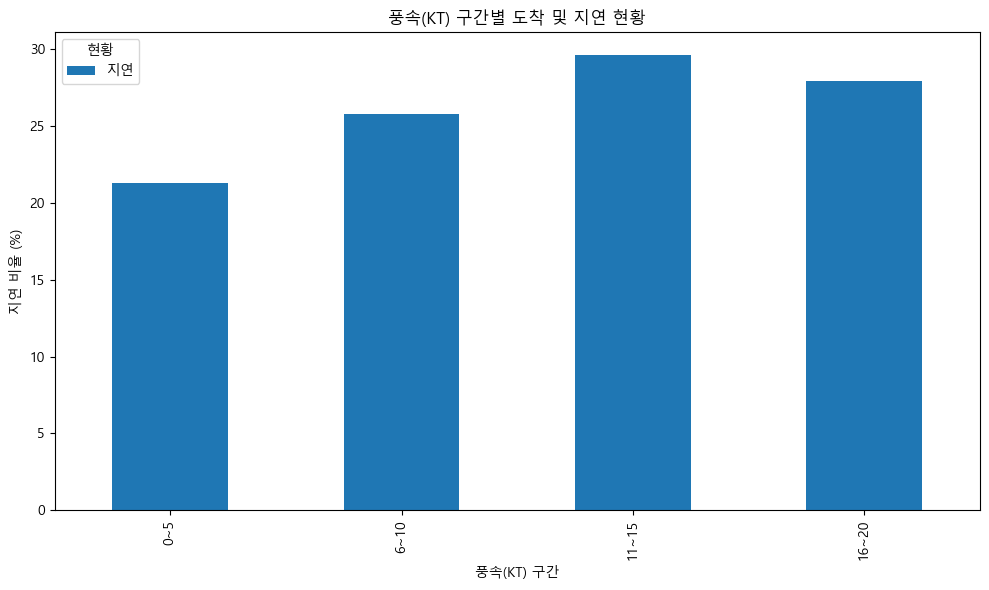

In [104]:
# WIND 구간 비율 시각화
WIND_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('풍속(KT) 구간')
plt.ylabel('지연 비율 (%)')
plt.title('풍속(KT) 구간별 도착 및 지연 현황')
plt.tight_layout()
plt.show()

In [124]:
import matplotlib.cm as cm

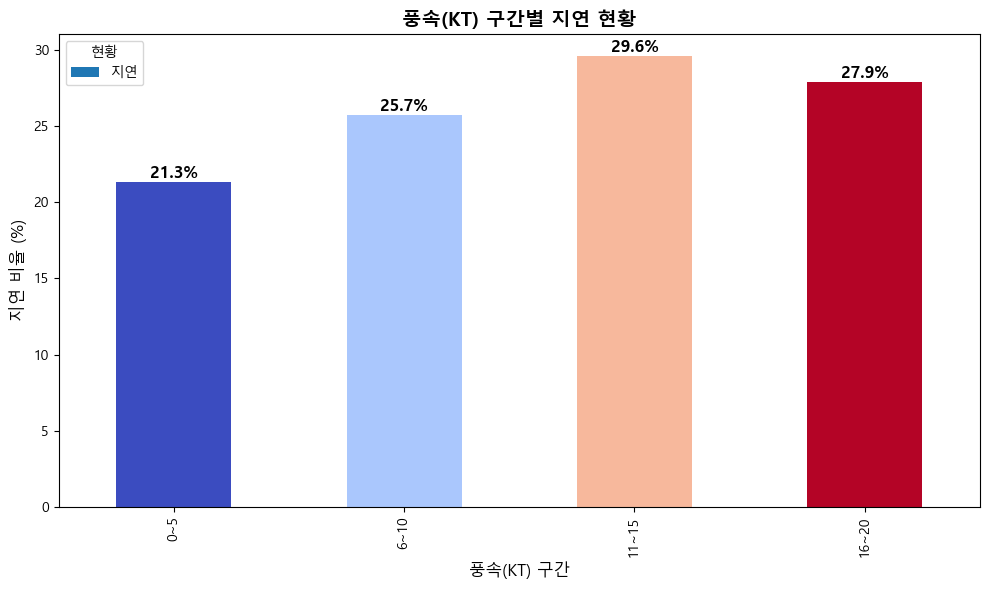

In [127]:
# 각 막대(풍속 구간) 수에 맞게 coolwarm 컬러맵에서 색상 추출
n = len(WIND_percent.index)
colors = cm.coolwarm(np.linspace(0, 1, n))

# DataFrame의 plot()으로 기본 막대 차트 그리기
ax = WIND_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# 각 막대를 순서대로 순회하면서 색상 변경
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])
    height = patch.get_height()
    x = patch.get_x() + patch.get_width()/2
    ax.text(x, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 축 레이블 및 제목 설정
ax.set_xlabel('풍속(KT) 구간', fontsize=12)
ax.set_ylabel('지연 비율 (%)', fontsize=12)
ax.set_title('풍속(KT) 구간별 지연 현황', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [74]:
CLOUD = GIMPO[GIMPO['현황'].isin(['지연', '도착'])] \
             .groupby('전운량(1/8)')['현황'] \
             .value_counts() \
             .unstack(fill_value=0)
print(CLOUD)

현황           도착    지연
전운량(1/8)             
0         14378  3409
1          4062  1058
2          3134   827
3          3534  1048
4          3298  1053
5          3383  1108
6          4456  1372
7          7202  2296
8          5383  3185


In [75]:
# CLOUD 구간 나누기

BINS_CLOUD = [(0,2), (3, 4), (5, 6), (7, 8)]
LABELS_CLOUD = ['0~2', '3~4', '5~6', '7~8']

# 인덱스 값(시정)을 해당 구간 레이블로 매핑하는 함수 정의
def CLOUD_bin(x):
    for (low, high), label in zip(BINS_CLOUD, LABELS_CLOUD):
        if low <= x <= high:
            return label
        
        
# 인덱스에 매핑 함수 적용하여 그룹화 (map을 통해 그룹키 생성)
CLOUD_grouped = CLOUD.groupby(CLOUD.index.map(CLOUD_bin)).sum()
CLOUD_grouped = CLOUD_grouped.reindex(LABELS_CLOUD)
print(CLOUD_grouped)

CLOUD_percent = CLOUD_grouped.div(CLOUD_grouped.sum(axis=1), axis=0) * 100
CLOUD_percent = CLOUD_percent[['지연']]

# 계산된 비율 확인
print(CLOUD_percent)

현황           도착    지연
전운량(1/8)             
0~2       21574  5294
3~4        6832  2101
5~6        7839  2480
7~8       12585  5481
현황               지연
전운량(1/8)           
0~2       19.703737
3~4       23.519534
5~6       24.033337
7~8       30.338758


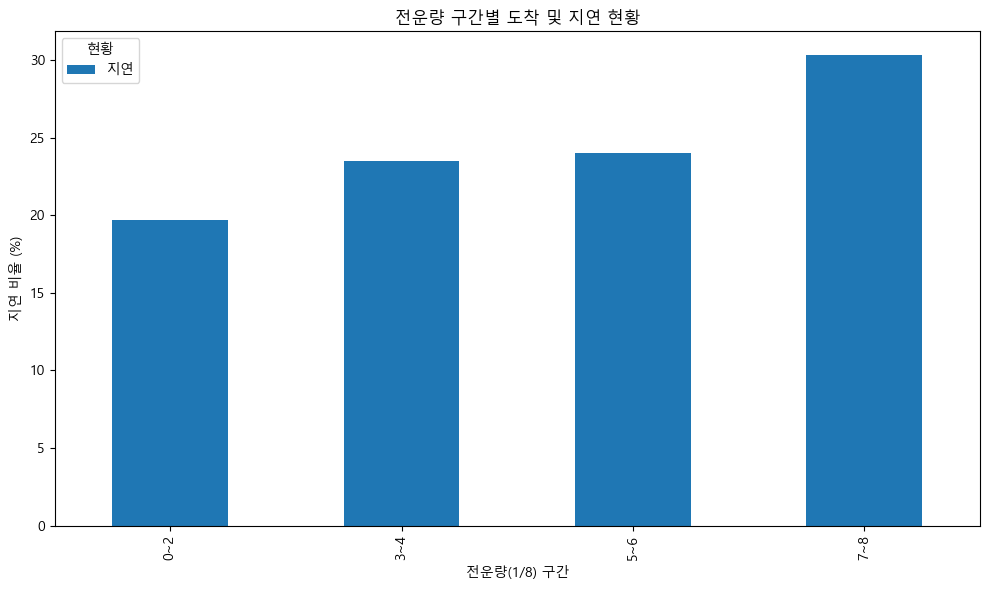

In [76]:
# CLOUD 구간 비율 시각화
CLOUD_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('전운량(1/8) 구간')
plt.ylabel('지연 비율 (%)')
plt.title('전운량 구간별 도착 및 지연 현황')
plt.tight_layout()
plt.show()

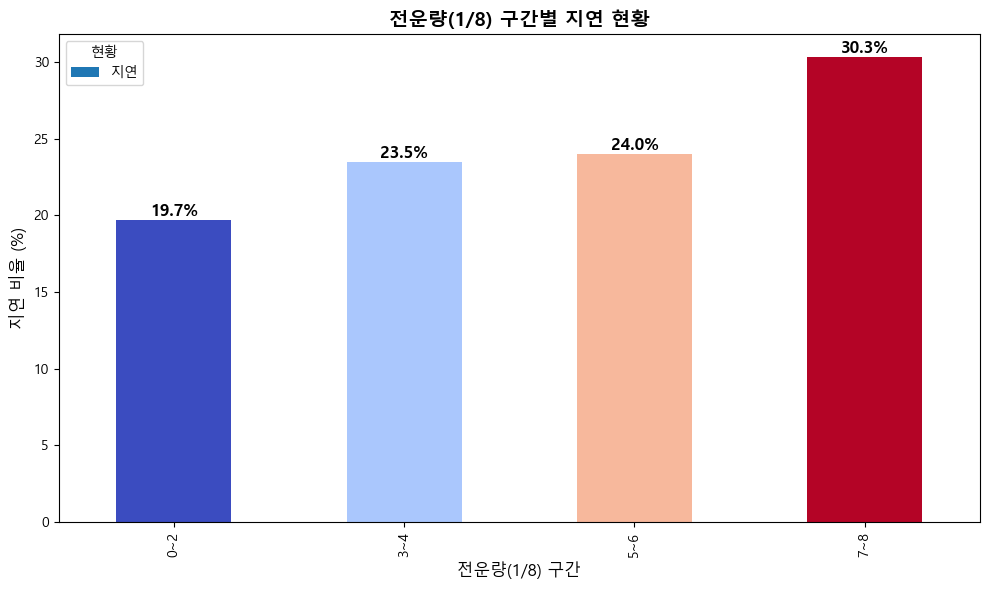

In [129]:
# 각 막대(전운량 구간) 수에 맞게 coolwarm 컬러맵에서 색상 추출
n = len(CLOUD_percent.index)
colors = cm.coolwarm(np.linspace(0, 1, n))

# DataFrame의 plot()으로 기본 막대 차트 그리기
ax = CLOUD_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# 각 막대를 순서대로 순회하면서 색상 변경
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])
    height = patch.get_height()
    x = patch.get_x() + patch.get_width()/2
    ax.text(x, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 축 레이블 및 제목 설정
ax.set_xlabel('전운량(1/8) 구간', fontsize=12)
ax.set_ylabel('지연 비율 (%)', fontsize=12)
ax.set_title('전운량(1/8) 구간별 지연 현황', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [77]:
SIGHT = GIMPO[GIMPO['현황'].isin(['지연', '도착'])] \
             .groupby('시정(m)')['현황'] \
             .value_counts() \
             .unstack(fill_value=0)
SIGHT

현황,도착,지연
시정(m),,
200,5,3
300,3,5
400,14,4
500,1,0
600,12,8
700,17,10
800,31,22
900,9,0
1000,15,18


In [135]:
# SIGHT 구간 나누기

BINS_SIGHT = [(200, 1000), (1200, 2000), (2200, 5000), (6000, 10000)]
LABELS_SIGHT = ['200~1000', '1200~2000', '2200~5000', '6000~10000']

# 인덱스 값(시정)을 해당 구간 레이블로 매핑하는 함수 정의
def SIGHT_bin(x):
    for (low, high), label in zip(BINS_SIGHT, LABELS_SIGHT):
        if low <= x <= high:
            return label
        
        
# 인덱스에 매핑 함수 적용하여 그룹화 (map을 통해 그룹키 생성)
SIGHT_grouped = SIGHT.groupby(SIGHT.index.map(SIGHT_bin)).sum()
SIGHT_grouped = SIGHT_grouped.reindex(LABELS_SIGHT)
print(SIGHT_grouped)

SIGHT_percent = SIGHT_grouped.div(SIGHT_grouped.sum(axis=1), axis=0) * 100
SIGHT_percent = SIGHT_percent[['지연']]

# 계산된 비율 확인
print(SIGHT_percent)

현황             도착     지연
시정(m)                   
200~1000      107     70
1200~2000     229    122
2200~5000    2433    848
6000~10000  46061  14316
현황                 지연
시정(m)                
200~1000    39.548023
1200~2000   34.757835
2200~5000   25.845779
6000~10000  23.711016


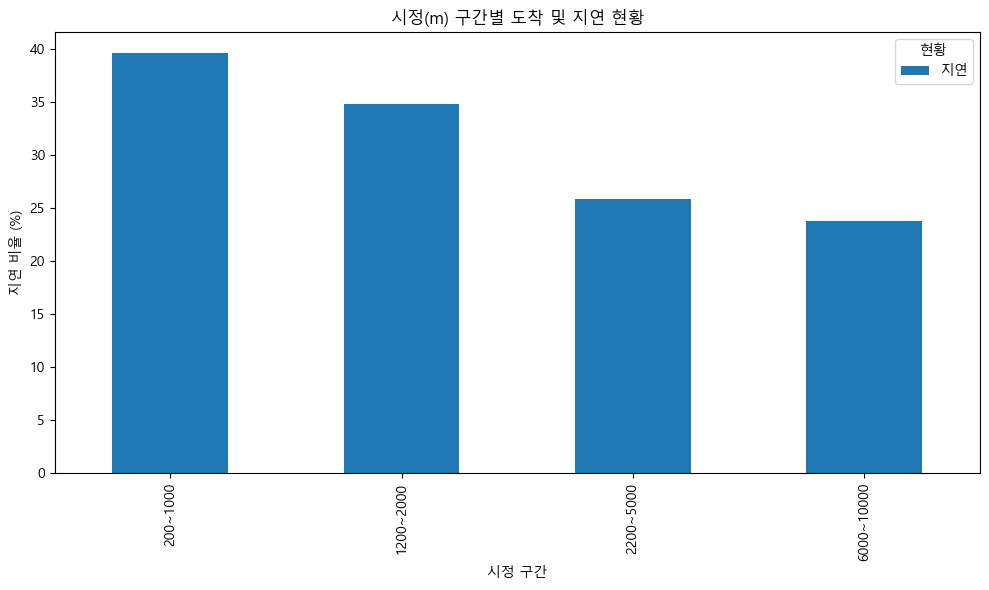

In [ ]:
# SIGHT 구간 비율 시각화
SIGHT_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('시정 구간')
plt.ylabel('지연 비율 (%)')
plt.title('시정(m) 구간별 도착 및 지연 현황')
plt.tight_layout()
plt.show()

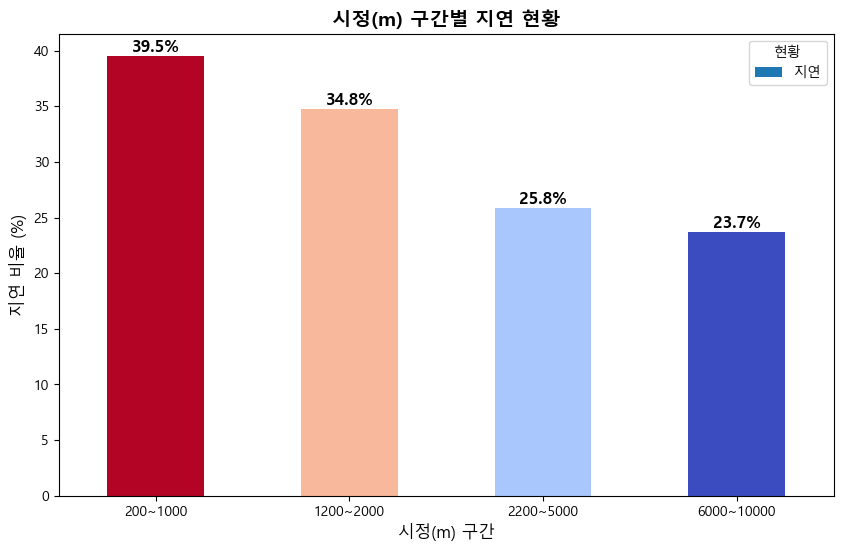

In [ ]:
# 막대 개수에 맞게 색상 추출 (coolwarm_r: coolwarm의 역순, 즉 붉은색에서 푸른색)
n = len(SIGHT_percent.index)
colors = cm.coolwarm_r(np.linspace(0, 1, n))

# DataFrame의 plot()으로 기본 막대 차트 그리기
ax = SIGHT_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# 각 막대를 순회하면서 색상 변경 및 지연 비율 텍스트 추가
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])
    height = patch.get_height()
    x = patch.get_x() + patch.get_width()/2
    ax.text(x, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 축 레이블 및 제목 설정
ax.set_xlabel('시정(m) 구간', fontsize=12)
ax.set_ylabel('지연 비율 (%)', fontsize=12)
ax.set_title('시정(m) 구간별 지연 현황', fontsize=14, fontweight='bold')

# x축 레이블을 가로로 표시
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


In [81]:
# 강수량(mm)
RAIN = GIMPO[GIMPO['현황'].isin(['지연', '도착'])] \
             .groupby('강수량(mm)')['현황'] \
             .value_counts() \
             .unstack(fill_value=0)
RAIN

현황,도착,지연
강수량(mm),,
0.0,46406,13798
0.1,317,158
0.2,212,163
0.3,294,140
0.4,123,53
...,...,...
21.9,8,3
25.0,5,4
26.5,2,7


In [82]:
# RAIN 구간 나누기

BINS_RAIN = [(0, 1), (1.1, 5), (5.1, 10), (10.1, 51.8)]
LABELS_RAIN = ['0~1', '1.1~5', '5.1~10', '10.1~51.8']

# 인덱스 값(시정)을 해당 구간 레이블로 매핑하는 함수 정의
def RAIN_bin(x):
    for (low, high), label in zip(BINS_RAIN, LABELS_RAIN):
        if low <= x <= high:
            return label
        
        
# 인덱스에 매핑 함수 적용하여 그룹화 (map을 통해 그룹키 생성)
RAIN_grouped = RAIN.groupby(RAIN.index.map(RAIN_bin)).sum()
RAIN_grouped = RAIN_grouped.reindex(LABELS_RAIN)
print(RAIN_grouped)

RAIN_percent = RAIN_grouped.div(RAIN_grouped.sum(axis=1), axis=0) * 100
RAIN_percent = RAIN_percent[['지연']]

# 계산된 비율 확인
print(RAIN_percent)

현황            도착     지연
강수량(mm)                
0~1        47909  14643
1.1~5        704    525
5.1~10       110    108
10.1~51.8    107     80
현황                지연
강수량(mm)             
0~1        23.409323
1.1~5      42.717657
5.1~10     49.541284
10.1~51.8  42.780749


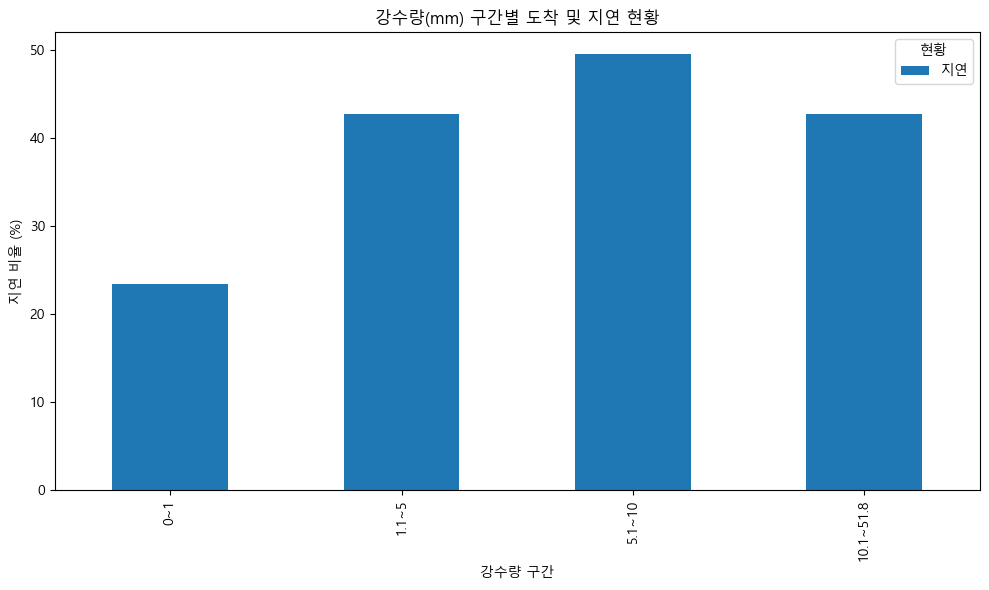

In [83]:
# RAIN 구간 비율 시각화
RAIN_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('강수량 구간')
plt.ylabel('지연 비율 (%)')
plt.title('강수량(mm) 구간별 도착 및 지연 현황')
plt.tight_layout()
plt.show()

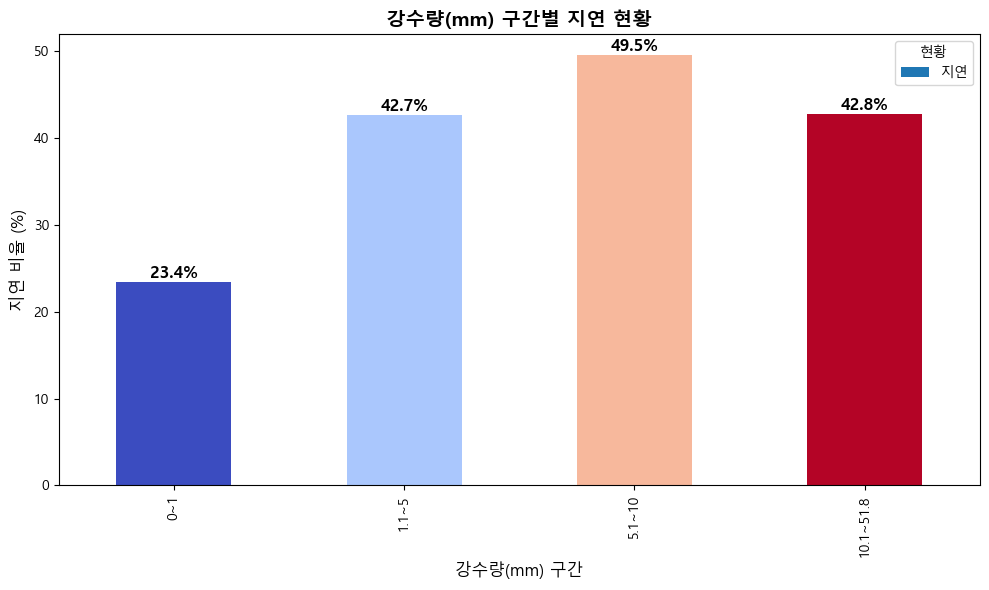

In [141]:
# 각 막대(강수량(mm) 구간) 수에 맞게 coolwarm 컬러맵에서 색상 추출
n = len(RAIN_percent.index)
colors = cm.coolwarm(np.linspace(0, 1, n))

# DataFrame의 plot()으로 기본 막대 차트 그리기
ax = RAIN_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# 각 막대를 순서대로 순회하면서 색상 변경
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])
    height = patch.get_height()
    x = patch.get_x() + patch.get_width()/2
    ax.text(x, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 축 레이블 및 제목 설정
ax.set_xlabel('강수량(mm) 구간', fontsize=12)
ax.set_ylabel('지연 비율 (%)', fontsize=12)
ax.set_title('강수량(mm) 구간별 지연 현황', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [84]:
# 기온(°C)

TEMP = GIMPO[GIMPO['현황'].isin(['도착','지연'])] \
             .groupby('기온(°C)')['현황'] \
             .value_counts() \
             .unstack(fill_value=0)
TEMP


현황,도착,지연
기온(°C),,
-13.6,1,0
-13.4,4,0
-12.2,1,0
-11.3,15,2
-11.1,10,13
...,...,...
35.4,6,8
35.5,11,4
36.1,5,1


In [85]:
# TEMP 구간 나누기

BINS_TEMP = [(-13.6, -10), (-19.9, 0), (0.1, 10), (10.1, 20),(20.1,30),(30.1,36.4)]
LABELS_TEMP = ['-13.6~-10', '-19.9~0', '0.1~10' , '10.1~20','20.1~30','30.1~36.4'] 

# 인덱스 값(시정)을 해당 구간 레이블로 매핑하는 함수 정의
def TEMP_bin(x):
    for (low, high), label in zip(BINS_TEMP, LABELS_TEMP):
        if low <= x <= high:
            return label
        
        
# 인덱스에 매핑 함수 적용하여 그룹화 (map을 통해 그룹키 생성)
TEMP_grouped = TEMP.groupby(TEMP.index.map(TEMP_bin)).sum()
TEMP_grouped = TEMP_grouped.reindex(LABELS_TEMP)
print(TEMP_grouped)

TEMP_percent = TEMP_grouped.div(TEMP_grouped.sum(axis=1), axis=0) * 100
TEMP_percent = TEMP_percent[['지연']]

# 계산된 비율 확인
print(TEMP_percent)

현황            도착    지연
기온(°C)                
-13.6~-10     63    45
-19.9~0     4033  1146
0.1~10     12814  3818
10.1~20    12018  3869
20.1~30    15785  5142
30.1~36.4   4117  1336
현황                지연
기온(°C)              
-13.6~-10  41.666667
-19.9~0    22.127824
0.1~10     22.955748
10.1~20    24.353245
20.1~30    24.571128
30.1~36.4  24.500275


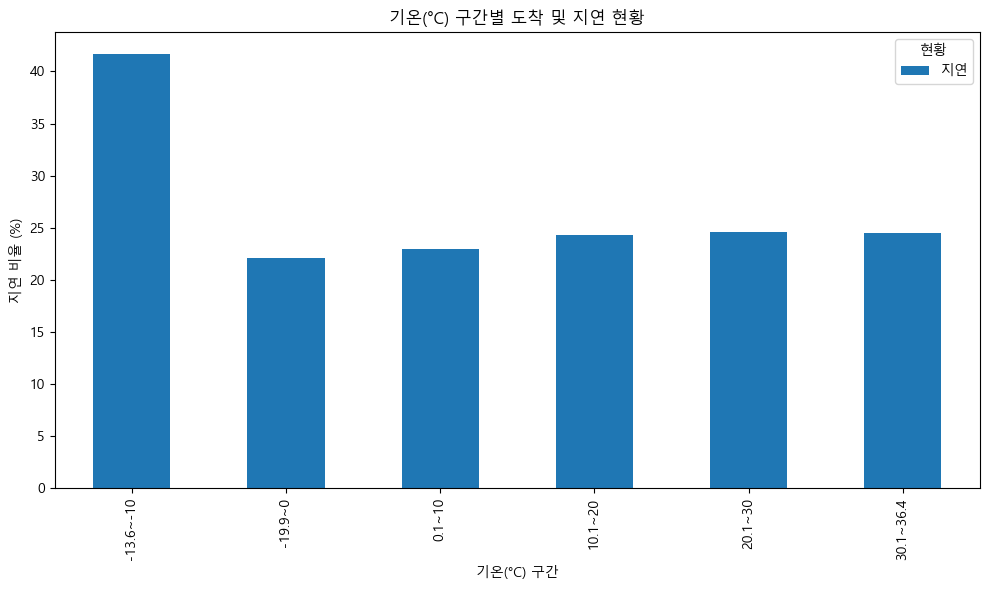

In [86]:
# TEMP 구간 비율 시각화
TEMP_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('기온(°C) 구간')
plt.ylabel('지연 비율 (%)')
plt.title('기온(°C) 구간별 도착 및 지연 현황')
plt.tight_layout()
plt.show()

In [87]:
# 이슬점온도(°C)	
DEW = GIMPO[GIMPO['현황'].isin(['도착','지연'])] \
             .groupby('이슬점온도(°C)')['현황'] \
             .value_counts() \
             .unstack(fill_value=0)
DEW


현황,도착,지연
이슬점온도(°C),,
-21.0,3,2
-20.9,1,0
-20.8,5,1
-20.5,6,0
-20.3,4,0
...,...,...
28.0,6,3
28.1,30,19
28.2,10,12


In [88]:
# DEW 구간 나누기

BINS_DEW = [(-21, -10), (-19.9, 0), (0.1, 10), (10.1, 20),(20.1,28.7)]
LABELS_DEW = ['-21~-10', '-19.9~0', '0.1~10' , '10.1~20','20.1~28.7'] 

# 인덱스 값(시정)을 해당 구간 레이블로 매핑하는 함수 정의
def DEW_bin(x):
    for (low, high), label in zip(BINS_DEW, LABELS_DEW):
        if low <= x <= high:
            return label
        
        
# 인덱스에 매핑 함수 적용하여 그룹화 (map을 통해 그룹키 생성)
DEW_grouped = DEW.groupby(DEW.index.map(DEW_bin)).sum()
DEW_grouped = DEW_grouped.reindex(LABELS_DEW)
print(DEW_grouped)

DEW_percent = DEW_grouped.div(DEW_grouped.sum(axis=1), axis=0) * 100
DEW_percent = DEW_percent[['지연']]

# 계산된 비율 확인
print(DEW_percent)

현황            도착    지연
이슬점온도(°C)             
-21~-10     2795   817
-19.9~0    11429  3271
0.1~10     11189  3470
10.1~20    12693  3824
20.1~28.7  10724  3974
현황                지연
이슬점온도(°C)           
-21~-10    22.619048
-19.9~0    22.251701
0.1~10     23.671465
10.1~20    23.151904
20.1~28.7  27.037692


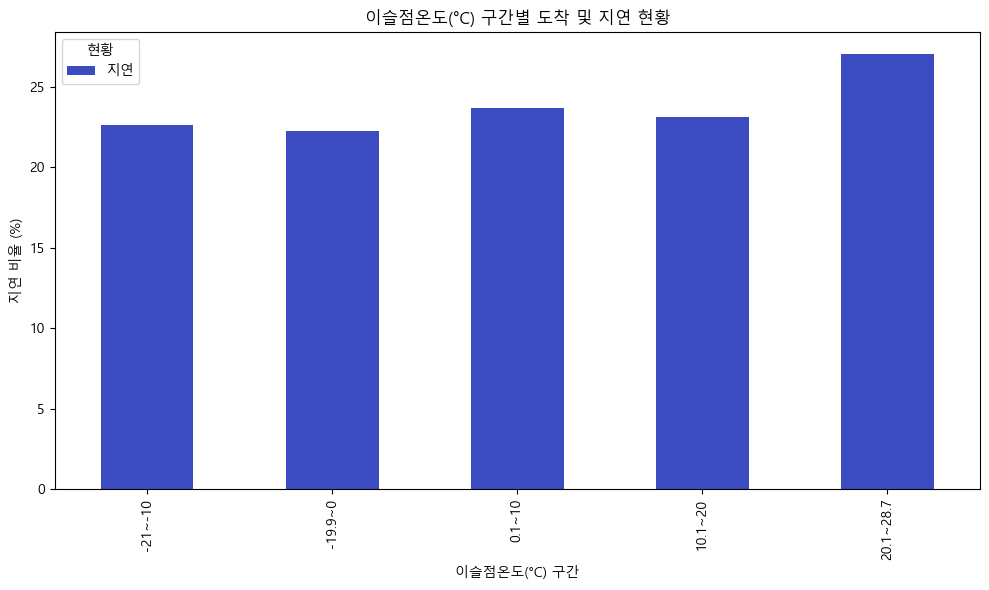

In [118]:

# DEW 구간 비율 시각화
DEW_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')


plt.xlabel('이슬점온도(°C) 구간')
plt.ylabel('지연 비율 (%)')
plt.title('이슬점온도(°C) 구간별 도착 및 지연 현황')
plt.tight_layout()
plt.show()

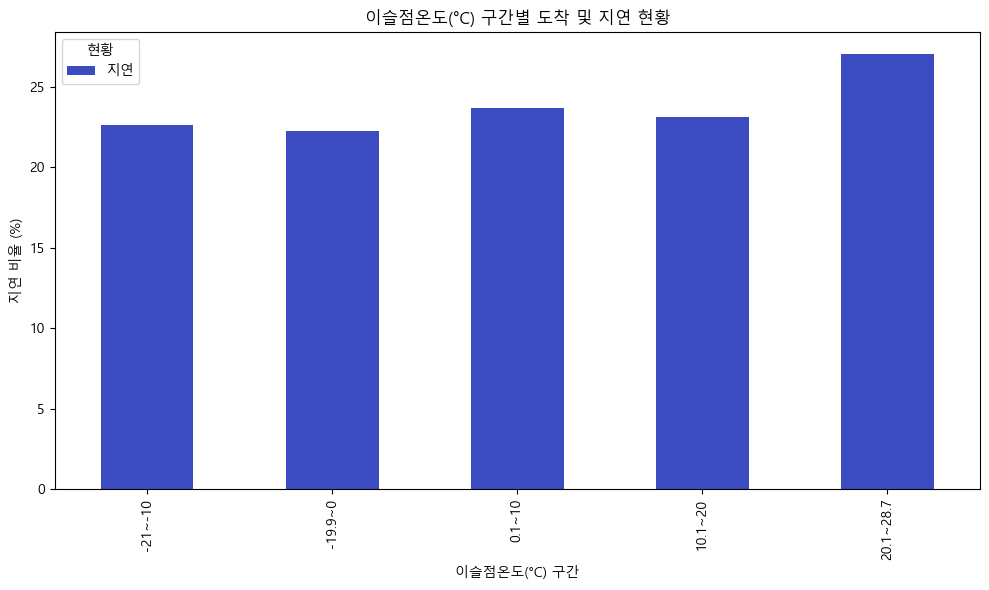

In [119]:
ax = DEW_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
ax.set(xlabel='이슬점온도(°C) 구간', ylabel='지연 비율 (%)',
       title='이슬점온도(°C) 구간별 도착 및 지연 현황')
plt.tight_layout()
plt.show()

In [90]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [91]:
# 기온과 이슬점온도 비교

In [92]:
# 1. 기온과 이슬점온도의 차이 계산
# GIMPO DataFrame에 '기온(°C)'와 '이슬점온도(°C)' 열이 있다고 가정합니다.
# 차이가 음수가 나올 수 있으면 절대값을 사용하거나, 음수도 포함할지 결정해야 합니다.
# 여기서는 (기온 - 이슬점온도)가 음수가 나오지 않는(또는 양수라고 가정) 상황으로 진행합니다.
GIMPO['diff'] = GIMPO['기온(°C)'] - GIMPO['이슬점온도(°C)']

# 2. 차이 구간(bins)과 레이블(label) 정의
# 예를 들어, 0부터 10까지 1 단위 구간으로 나눈다고 가정
bins = [-1,1, 2, 3, 4, 10,20,21,40]
labels = [f"{bins[i]}~{bins[i+1]}" for i in range(len(bins)-1)]
# labels 결과: ["0~1", "1~2", "2~3", ..., "9~10"]

# 3. pd.cut()을 이용해 차이를 구간별로 분류 (새로운 열을 만들지 않고 바로 매핑)
diff_bins = pd.cut(GIMPO['diff'], bins=bins, labels=labels, include_lowest=True)

# 4. 각 구간별 빈도수 계산 및 백분율 변환
diff_counts = diff_bins.value_counts().sort_index()
diff_percent = diff_counts / diff_counts.sum() * 100

# 결과 확인
print(diff_counts)
print(diff_percent)


diff
-1~1      7607
1~2       4834
2~3       4558
3~4       4377
4~10     26538
10~20    15620
20~21      130
21~40      524
Name: count, dtype: int64
diff
-1~1     11.851125
1~2       7.531003
2~3       7.101016
3~4       6.819032
4~10     41.344176
10~20    24.334767
20~21     0.202530
21~40     0.816352
Name: count, dtype: float64


현황        delay_rate
diff_bin            
-1~1       30.239285
1~2        27.865122
2~3        23.979816
3~5        23.026098
5~40       22.371218


C:\Users\KDP-27\AppData\Local\Temp\ipykernel_43892\4223400534.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = subset.groupby('diff_bin')['현황'].value_counts().unstack(fill_value=0)


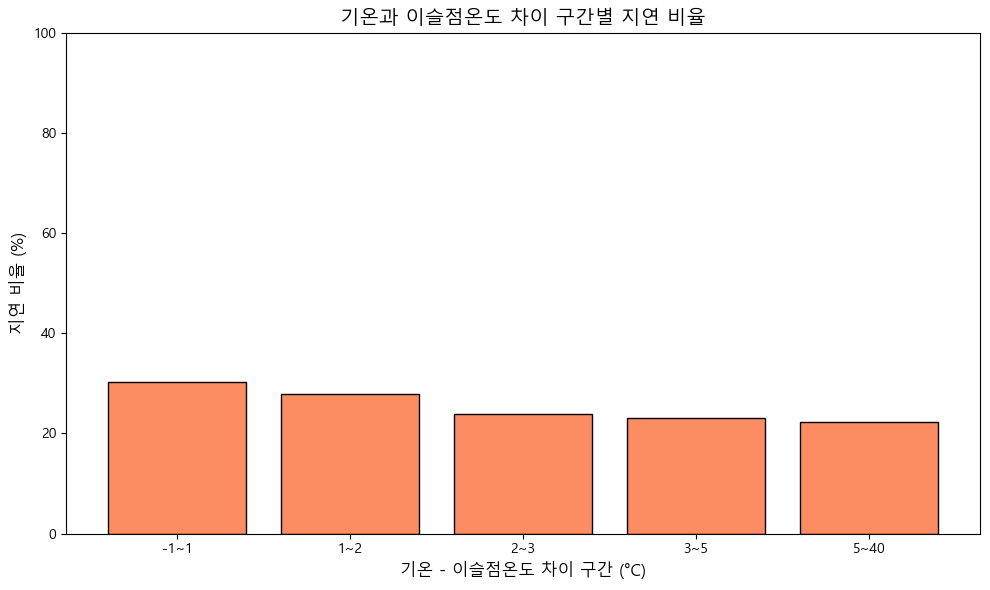

In [145]:
# 1. 기온과 이슬점온도의 차이 계산
# GIMPO DataFrame에 '기온(°C)'와 '이슬점온도(°C)', 그리고 '현황' 열이 있다고 가정합니다.
# '현황'에는 "도착"과 "지연" (기타 항목은 제외) 값이 있습니다.
GIMPO['diff'] = GIMPO['기온(°C)'] - GIMPO['이슬점온도(°C)']

# 2. "도착"과 "지연"만을 사용 (원하는 경우)
subset = GIMPO[GIMPO['현황'].isin(['도착', '지연'])].copy()

# 3. 차이 구간 설정
# 예를 들어, 0부터 10까지 1 단위 구간으로 나눕니다.
# (원하는 구간이 "0~1, 1.1~2, ..."라면 경계값을 조정하면 됩니다.)
bins = [-1, 1, 2, 3, 5, 40]
labels = [f"{bins[i]}~{bins[i+1]}" for i in range(len(bins)-1)]
# labels 결과: ['0~1', '1~2', '2~3', …, '9~10']

# 4. pd.cut()을 사용하여 'diff' 값을 구간별로 분류 (새로운 열 'diff_bin' 생성)
subset['diff_bin'] = pd.cut(subset['diff'], bins=bins, labels=labels, include_lowest=True)

# 5. 각 구간별로 "지연"과 "도착" 건수를 계산
#    그룹화 후 value_counts()를 사용하여 결과를 피벗합니다.
grouped = subset.groupby('diff_bin')['현황'].value_counts().unstack(fill_value=0)

# 6. 각 구간의 총 건수와 "지연" 건수를 이용하여 지연 비율 계산
grouped['total'] = grouped.sum(axis=1)
# grouped.get('지연', 0)는 만약 '지연' 열이 없을 경우를 대비한 안전한 접근 방식입니다.
grouped['delay_rate'] = (grouped.get('지연', 0) / grouped['total']) * 100

# 7. 계산된 지연 비율 확인 (원하는 경우)
print(grouped[['delay_rate']])

# 8. 지연 비율 막대 차트로 시각화
plt.figure(figsize=(10, 6))
plt.bar(grouped.index.astype(str), grouped['delay_rate'], color='#fc8d62', edgecolor='black')
plt.xlabel('기온 - 이슬점온도 차이 구간 (°C)', fontsize=12)
plt.ylabel('지연 비율 (%)', fontsize=12)
plt.title('기온과 이슬점온도 차이 구간별 지연 비율', fontsize=14)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [94]:
# 예시: 이미 GIMPO 데이터프레임이 병합되어 있다고 가정합니다.
# GIMPO에는 '현황', '강수량(mm)', '시정(m)', '전운량(1/8)', '풍속(KT)' 등의 열이 포함되어 있음

# 1. "현황"을 이용해 지연 여부를 0과 1로 표시하는 새로운 열 생성
#    - '지연'이면 1, '도착'이면 0 (기타 항목은 필요에 따라 처리)
GIMPO['delay_flag'] = np.where(GIMPO['현황'] == '지연', 1, 0)

# 2. 상관계수를 계산할 열 선택
cols_of_interest = ['delay_flag', '강수량(mm)', '시정(m)', '전운량(1/8)', '풍속(KT)']

# 3. 선택한 열에 대해 상관계수 행렬 계산
corr_matrix = GIMPO[cols_of_interest].corr()
print("상관계수 행렬:")
print(corr_matrix)

# 4. "지연 여부" (delay_flag)와 다른 기상 변수들 간의 상관계수만 추출하여 출력
delay_corr = corr_matrix['delay_flag'].drop('delay_flag')  # delay_flag와 자기 자신 제외
print("\n지연 여부와 각 기상 변수 간의 상관계수:")
print(delay_corr)

상관계수 행렬:
            delay_flag   강수량(mm)     시정(m)  전운량(1/8)    풍속(KT)
delay_flag    1.000000  0.046655 -0.023781  0.105229  0.070711
강수량(mm)       0.046655  1.000000 -0.238512  0.147562  0.047955
시정(m)        -0.023781 -0.238512  1.000000 -0.188882  0.097178
전운량(1/8)      0.105229  0.147562 -0.188882  1.000000  0.098695
풍속(KT)        0.070711  0.047955  0.097178  0.098695  1.000000

지연 여부와 각 기상 변수 간의 상관계수:
강수량(mm)     0.046655
시정(m)      -0.023781
전운량(1/8)    0.105229
풍속(KT)      0.070711
Name: delay_flag, dtype: float64


In [95]:
# 구간의 중간값을 계산하는 함수
def compute_bin_midpoints(bins):
    """
    bins: [(low1, high1), (low2, high2), ...]
    반환: [mid1, mid2, ...] (각 구간의 중간값)
    """
    return [ (low + high) / 2 for (low, high) in bins ]

# 만약 각 DataFrame에서 '지연' 열이 KeyError가 발생하면 첫 번째 열을 사용하도록 하는 함수
def get_delay_values(df, col_name='지연'):
    if col_name in df.columns:
        return df[col_name].values
    else:
        # KeyError 발생 시, 첫 번째 열의 값을 사용
        return df.iloc[:, 0].values

# =====================================================
# 1. 강수량(mm)
# =====================================================
# 강수량 구간 정의 (예시)
BINS_RAIN = [(0, 1), (1.1, 5), (5.1, 10), (10.1, 51.8)]
LABELS_RAIN = ['0~1', '1.1~5', '5.1~10', '10.1~51.8']
# 각 구간의 중간값 계산
mid_rain = compute_bin_midpoints(BINS_RAIN)
# RAIN_percent DataFrame에서 지연률 값을 가져오기
delay_rate_rain = get_delay_values(RAIN_percent, '지연')
# 상관계수 계산
corr_rain = np.corrcoef(mid_rain, delay_rate_rain)[0, 1]
print("강수량(mm) 구간별 지연률과 구간 중간값의 상관계수:", corr_rain)

# =====================================================
# 2. 시정(m)
# =====================================================
BINS_SIGHT = [(200, 1000), (1200, 2000), (2200, 5000), (6000, 10000)]
LABELS_SIGHT = ['200~1000', '1200~2000', '2200~5000', '6000~10000']
mid_sight = compute_bin_midpoints(BINS_SIGHT)
delay_rate_sight = get_delay_values(SIGHT_percent, '지연')
corr_sight = np.corrcoef(mid_sight, delay_rate_sight)[0, 1]
print("시정(m) 구간별 지연률과 구간 중간값의 상관계수:", corr_sight)

# =====================================================
# 3. 전운량(1/8)
# =====================================================
BINS_CLOUD = [(0, 2), (3, 4), (5, 6), (7, 8)]
LABELS_CLOUD = ['0~2', '3~4', '5~6', '7~8']
mid_cloud = compute_bin_midpoints(BINS_CLOUD)
delay_rate_cloud = get_delay_values(CLOUD_percent, '지연')
corr_cloud = np.corrcoef(mid_cloud, delay_rate_cloud)[0, 1]
print("전운량(1/8) 구간별 지연률과 구간 중간값의 상관계수:", corr_cloud)

# =====================================================
# 4. 풍속(KT)
# =====================================================
BINS_WIND = [(0, 5), (6, 10), (11, 15), (16, 20)]
LABELS_WIND = ['0~5', '6~10', '11~15', '16~20']
mid_wind = compute_bin_midpoints(BINS_WIND)
delay_rate_wind = get_delay_values(WIND_percent, '지연')
corr_wind = np.corrcoef(mid_wind, delay_rate_wind)[0, 1]
print("풍속(KT) 구간별 지연률과 구간 중간값의 상관계수:", corr_wind)


강수량(mm) 구간별 지연률과 구간 중간값의 상관계수: 0.3703229390751099
시정(m) 구간별 지연률과 구간 중간값의 상관계수: -0.8891818197244725
전운량(1/8) 구간별 지연률과 구간 중간값의 상관계수: 0.9461215745638661
풍속(KT) 구간별 지연률과 구간 중간값의 상관계수: 0.8610602720414717


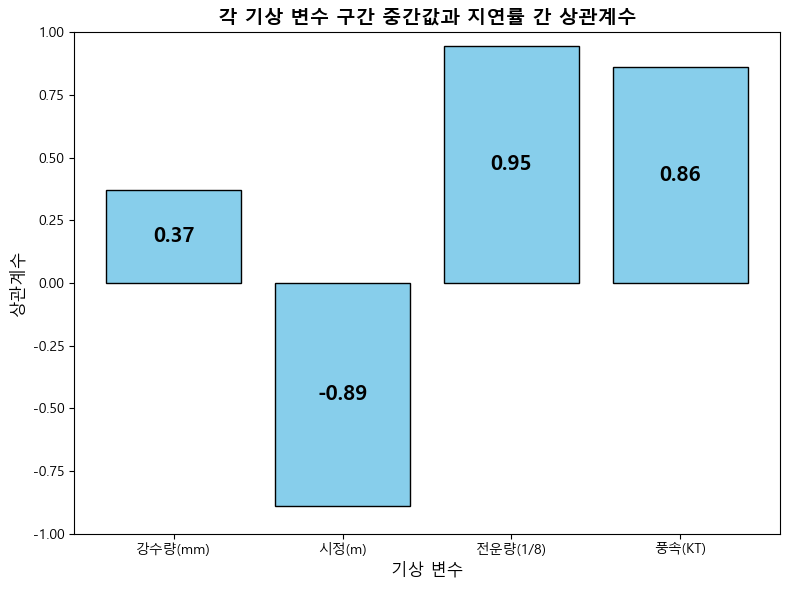

In [96]:
# 방법 1: 음수 기호 대신 하이픈 사용
plt.rcParams['axes.unicode_minus'] = False


# 이미 각 변수별 상관계수를 계산한 변수들
# 예시 변수 이름: corr_rain, corr_sight, corr_cloud, corr_wind
# (계산한 상관계수 값이 음수일 수도 있으므로, y축 범위는 [-1, 1]로 설정합니다.)

# 변수 이름과 상관계수를 리스트에 저장
variables = ['강수량(mm)', '시정(m)', '전운량(1/8)', '풍속(KT)']
corr_values = [corr_rain, corr_sight, corr_cloud, corr_wind]

# Figure 생성
plt.figure(figsize=(8, 6))
bars = plt.bar(variables, corr_values, color='skyblue', edgecolor='black')

# 축 레이블과 제목 설정
plt.xlabel('기상 변수', fontsize=12)
plt.ylabel('상관계수', fontsize=12)
plt.title('각 기상 변수 구간 중간값과 지연률 간 상관계수', fontsize=14, fontweight='bold')
plt.ylim(-1, 1)  # 상관계수의 범위는 -1 ~ 1

# 각 막대 위에 상관계수 값 표시 (소수점 둘째자리까지)
for bar, corr in zip(bars, corr_values):
    height = bar.get_height()  # 막대의 높이
    plt.text(bar.get_x() + bar.get_width()/2,  # 막대의 중앙 (x좌표)
             height / 2,  # 막대 높이의 절반 (y좌표)
             f'{corr:.2f}',  # 표시할 값
             ha='center', va='center',  # 중앙 정렬
             fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_43892\2063500063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='기상 변수', y='지연 비율', data=boxplot_df, palette='coolwarm')


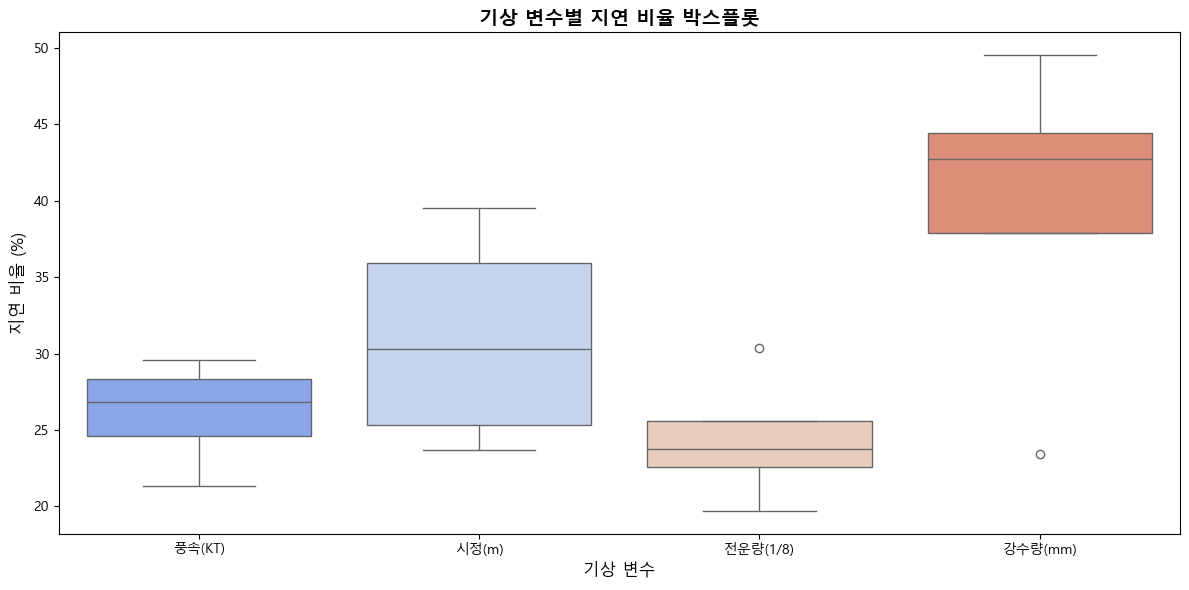

In [99]:
# 데이터 준비: 각 변수별 구간과 지연 비율을 데이터프레임으로 변환
boxplot_data = []

# 풍속(KT)
for category, value in WIND_percent['지연'].items():
    boxplot_data.append(['풍속(KT)', category, value])

# 시정(m)
for category, value in SIGHT_percent['지연'].items():
    boxplot_data.append(['시정(m)', category, value])

# 전운량(1/8)
for category, value in CLOUD_percent['지연'].items():
    boxplot_data.append(['전운량(1/8)', category, value])

# 강수량(mm)
for category, value in RAIN_percent['지연'].items():
    boxplot_data.append(['강수량(mm)', category, value])

# 데이터프레임 변환
boxplot_df = pd.DataFrame(boxplot_data, columns=['기상 변수', '구간', '지연 비율'])

# 📌 박스플롯 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='기상 변수', y='지연 비율', data=boxplot_df, palette='coolwarm')

# 제목 및 라벨 설정
plt.title('기상 변수별 지연 비율 박스플롯', fontsize=14, fontweight='bold')
plt.xlabel('기상 변수', fontsize=12)
plt.ylabel('지연 비율 (%)', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_43892\1900489447.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='구간', y='지연 비율', data=boxplot_df, ax=axes[idx], palette='coolwarm')
C:\Users\KDP-27\AppData\Local\Temp\ipykernel_43892\1900489447.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='구간', y='지연 비율', data=boxplot_df, ax=axes[idx], palette='coolwarm')
C:\Users\KDP-27\AppData\Local\Temp\ipykernel_43892\1900489447.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='구간', y='지연 비율', data=boxplot_df, ax=axes[idx], palette='coo

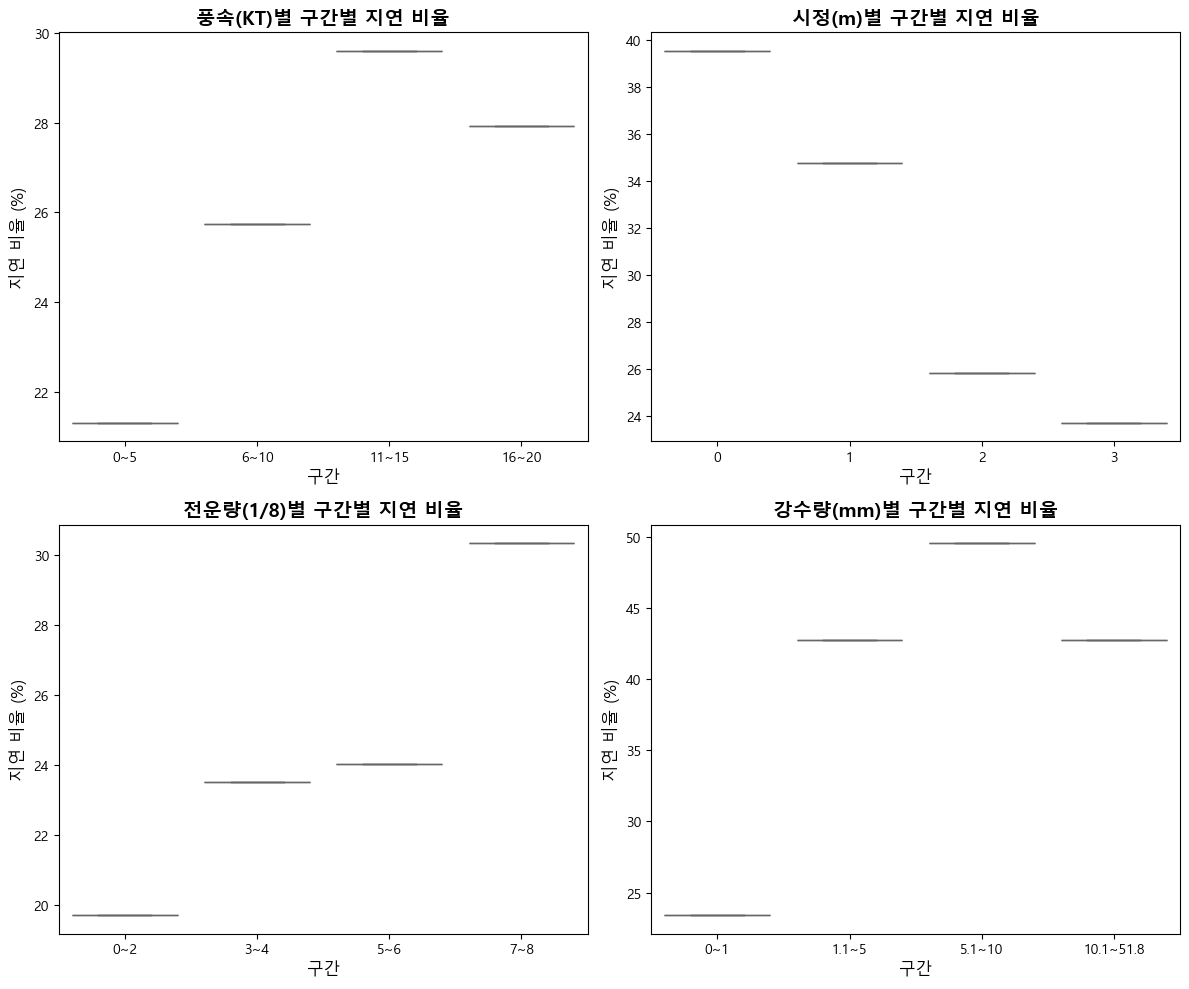

In [102]:
# 📌 박스플롯을 개별적으로 그릴 데이터 준비 함수
def prepare_boxplot_data(percent_df, variable_name):
    boxplot_data = []
    for category, value in percent_df['지연'].items():
        boxplot_data.append([variable_name, category, value])
    return pd.DataFrame(boxplot_data, columns=['기상 변수', '구간', '지연 비율'])

# 각 기상 변수별 박스플롯 개별 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 서브플롯 생성
axes = axes.flatten()  # 2차원 배열을 1차원 리스트로 변환

# 기상 변수 목록 및 데이터프레임 매핑
weather_factors = {
    "풍속(KT)": WIND_percent,
    "시정(m)": SIGHT_percent,  # ✅ 수정된 시정 구간 적용
    "전운량(1/8)": CLOUD_percent,
    "강수량(mm)": RAIN_percent
}

# 개별 박스플롯 생성
for idx, (factor, df) in enumerate(weather_factors.items()):
    boxplot_df = prepare_boxplot_data(df, factor)
    sns.boxplot(x='구간', y='지연 비율', data=boxplot_df, ax=axes[idx], palette='coolwarm')
    
    # 그래프 제목 및 라벨 설정
    axes[idx].set_title(f'{factor}별 구간별 지연 비율', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('구간', fontsize=12)
    axes[idx].set_ylabel('지연 비율 (%)', fontsize=12)

plt.tight_layout()
plt.show()